In [26]:
import os, sys
cwd = os.getcwd()
project_path = cwd[:cwd.find('pygents')+7]
if project_path not in sys.path: sys.path.append(project_path)
os.chdir(project_path) 

#from importlib import reload  # Python 3.4+

import pickle
import pandas as pd

#force reimport
if 'pygents.util' in sys.modules:
    del sys.modules['pygents.util']
if 'pygents.text' in sys.modules:
    del sys.modules['pygents.text']
if 'pygents.plot' in sys.modules:
    del sys.modules['pygents.plot']
if 'pygents.token' in sys.modules:
    del sys.modules['pygents.token']
if 'pygents.token_plot' in sys.modules:
    del sys.modules['pygents.token_plot']


from pygents.token import *
from pygents.text import *
from pygents.util import *
from pygents.plot import plot_bars, plot_dict, matrix_plot
from pygents.token_plot import *

In [27]:
brown_text = url_text("http://www.sls.hawaii.edu/bley-vroman/brown_nolines.txt")
print(len(brown_text))


6006249


In [28]:
brown_text_1 = brown_text[:round(len(brown_text)/2)]
brown_text_2 = brown_text[round(len(brown_text)/2):]
print(len(brown_text_1),len(brown_text_2),len(brown_text_1)+len(brown_text_2))


3003124 3003125 6006249


In [29]:
gutenberg_brown_chars_1 = FreedomTokenizer(max_n=7,mode='chars',debug=False)
gutenberg_brown_chars_1.train([brown_text_1])
print(gutenberg_brown_chars_1.count_params())
gutenberg_brown_chars_1.store('data/models/brown_chars_7_1')
#7200203

7200203


In [30]:
gutenberg_brown_chars_2 = FreedomTokenizer(max_n=7,mode='chars',debug=False)
gutenberg_brown_chars_2.train([brown_text_2])
print(gutenberg_brown_chars_2.count_params())
gutenberg_brown_chars_2.store('data/models/brown_chars_7_2')
#6867834

6867834


In [31]:
path = '../../nlp/corpora/Chinese/'
test_df = pd.read_csv(os.path.join(path,'magicdata/zh_en_ru_100/CORPUS_ZH_EN_RU.txt'),delimiter='\t')
test_texts = list(test_df['en'])
print(len(test_texts))
test_df[['en']]

100


,en
0,What about medical insurance? As for my family...
1,"For those who have insurance, according to the..."
2,Need to realize the importance of having insur...
3,"In fact, this phenomenon is indeed very common..."
4,It is really necessary for this generation of ...
...,...
95,Ant Insurance does not only offer car insuranc...
96,"However, when buying a house, except for the d..."
97,This kind of financial investment has certain ...
98,"If your investment orientation is right, then ..."


In [32]:
model_thresholds = [0,0.0001,0.001,0.01,0.1]
ngram_params = [[1],[2],[3],[4],[5],[6],[7],[1,2],[2,3],[1,2,3],[1,2,3,4],[4,5,6,7],[1,2,3,4,5],[1,2,3,4,5,6,7]]
token_thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
ref_tokenizer = DelimiterTokenizer()


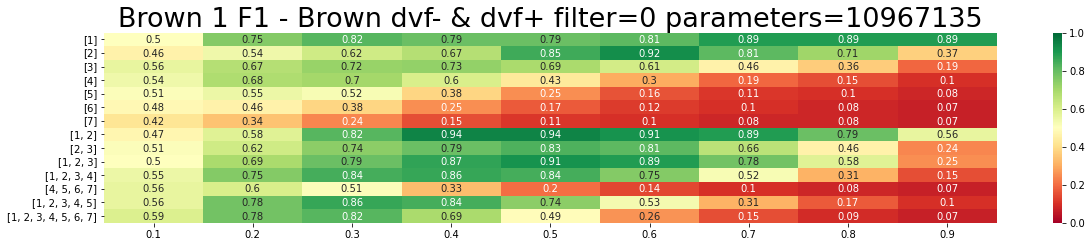

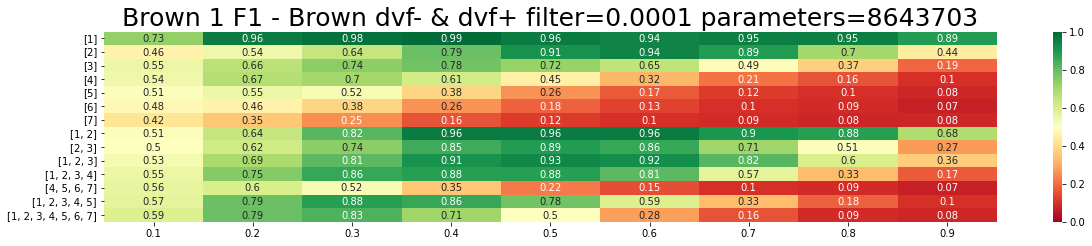

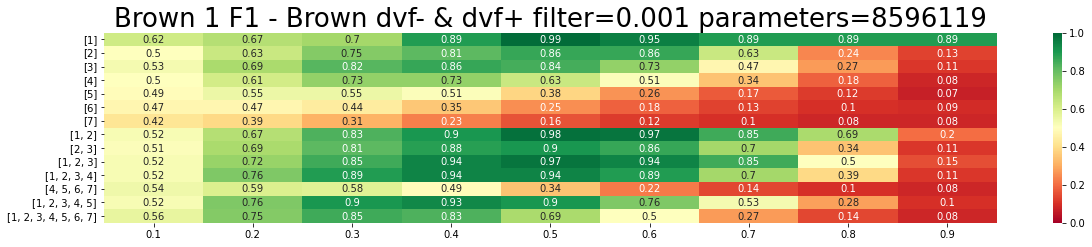

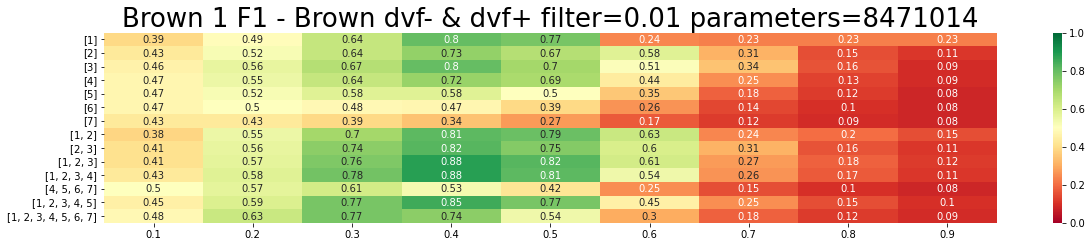

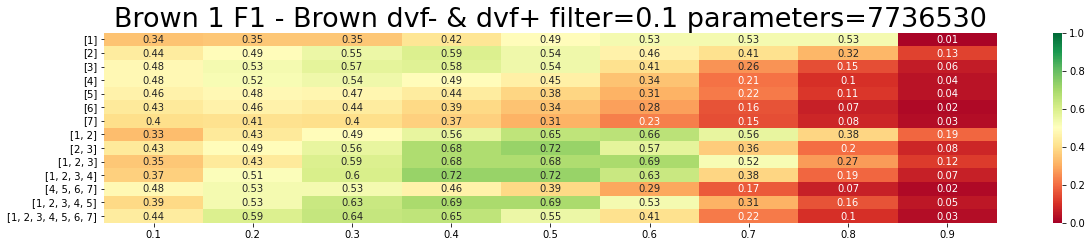

In [47]:
base = FreedomTokenizer(name='data/models/brown_nolines_chars_7a',max_n=7,mode='chars',debug=False)
title = 'F1 - Brown dvf- & dvf+'
ref_full_list = []
for model_threshold in model_thresholds:
    if model_threshold > 0:
        model_compress_with_loss(base.model,model_threshold)
    parameters = base.count_params()
    metrics = evaluate_freedom_tokenizer_options(test_texts,ref_tokenizer,FreedomBasedTokenizer(base,'dvf-','dvf+'),
        ngram_params,token_thresholds,title="Brown 1 {} filter={} parameters={}".format(title,model_threshold,parameters))
    ref_full_list.extend([(model_threshold,m[0],m[1],m[2]) for m in metrics])
del base


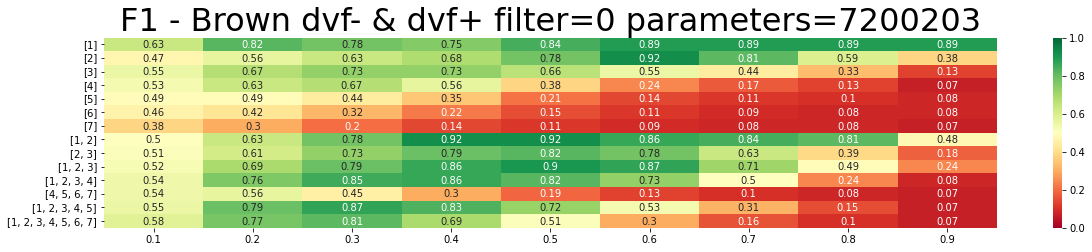

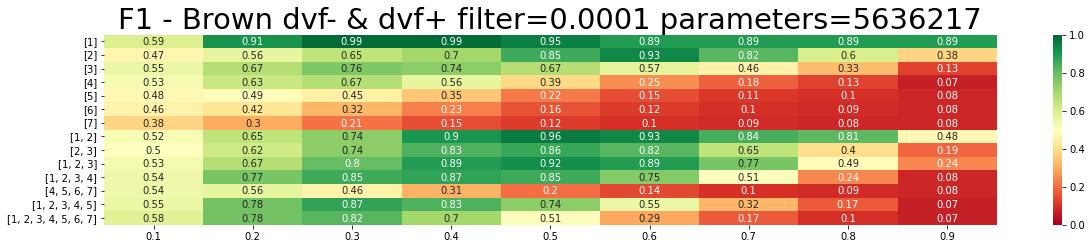

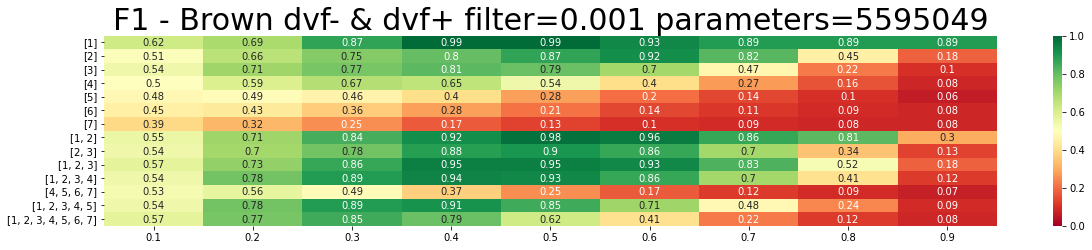

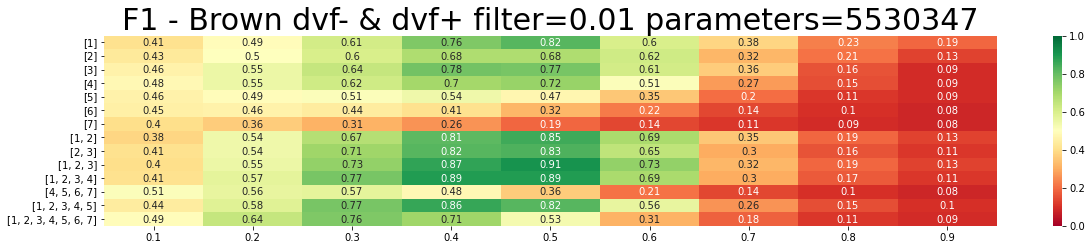

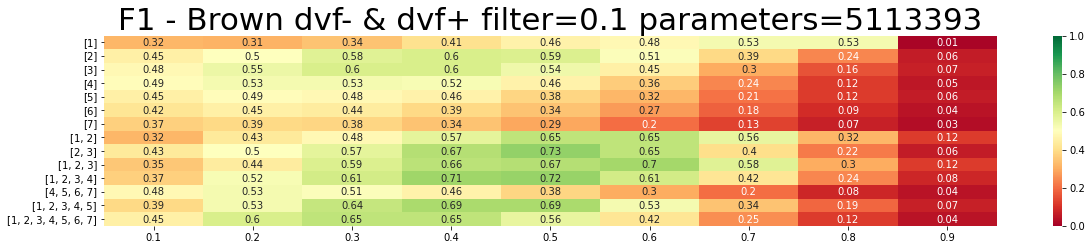

In [48]:
base = FreedomTokenizer(name='data/models/brown_chars_7_1',max_n=7,mode='chars',debug=False)
title = 'F1 - Brown dvf- & dvf+'
ref_1_list = []
for model_threshold in model_thresholds:
    if model_threshold > 0:
        model_compress_with_loss(base.model,model_threshold)
    parameters = base.count_params()
    metrics = evaluate_freedom_tokenizer_options(test_texts,ref_tokenizer,FreedomBasedTokenizer(base,'dvf-','dvf+'),
        ngram_params,token_thresholds,title="{} filter={} parameters={}".format(title,model_threshold,parameters))
    ref_1_list.extend([(model_threshold,m[0],m[1],m[2]) for m in metrics])
del base


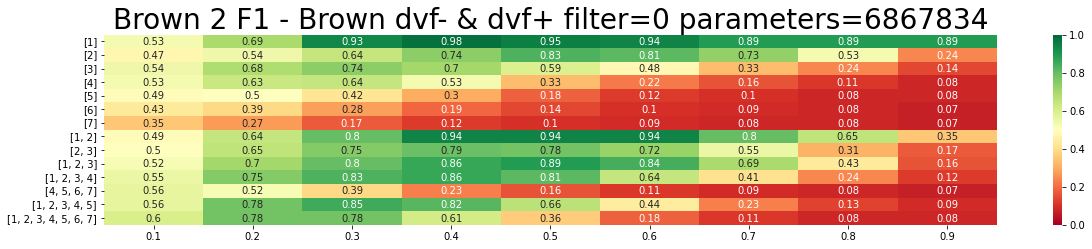

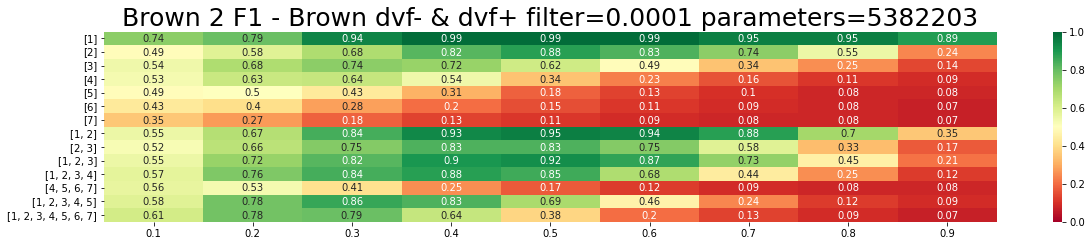

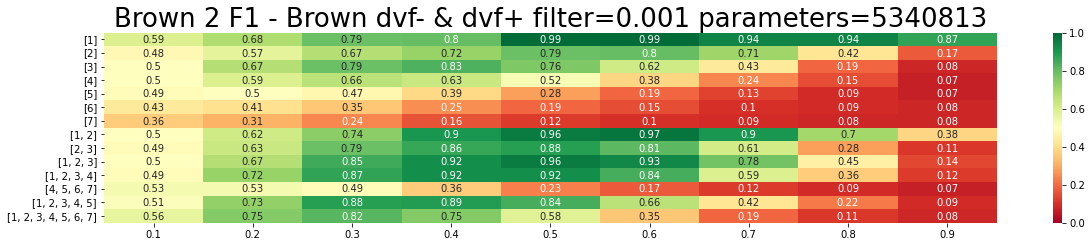

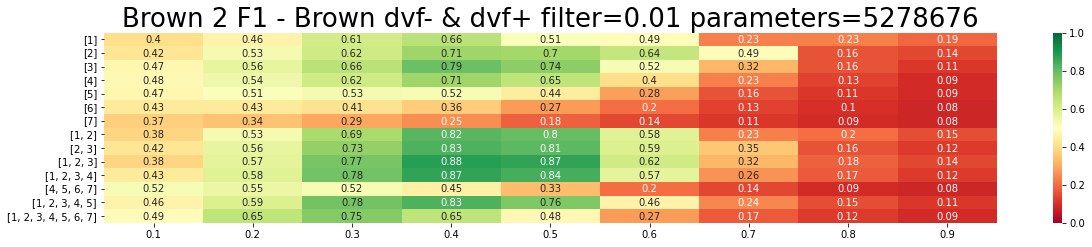

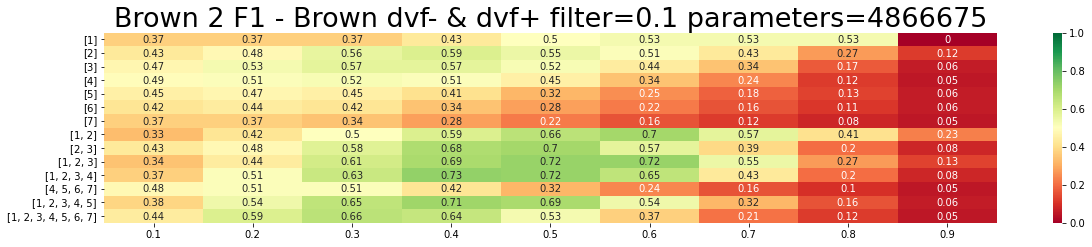

In [49]:
base = FreedomTokenizer(name='data/models/brown_chars_7_2',max_n=7,mode='chars',debug=False)
title = 'F1 - Brown dvf- & dvf+'
ref_2_list = []
for model_threshold in model_thresholds:
    if model_threshold > 0:
        model_compress_with_loss(base.model,model_threshold)
    parameters = base.count_params()
    metrics = evaluate_freedom_tokenizer_options(test_texts,ref_tokenizer,FreedomBasedTokenizer(base,'dvf-','dvf+'),
        ngram_params,token_thresholds,title="Brown 2 {} filter={} parameters={}".format(title,model_threshold,parameters))
    ref_2_list.extend([(model_threshold,m[0],m[1],m[2]) for m in metrics])
del base


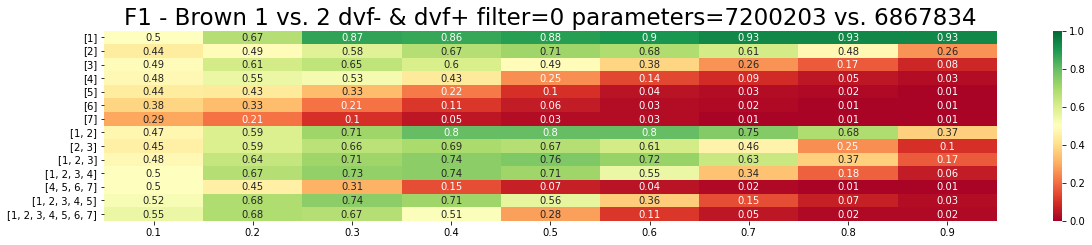

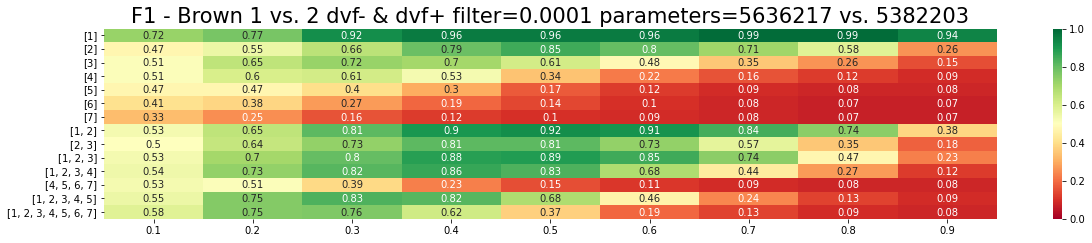

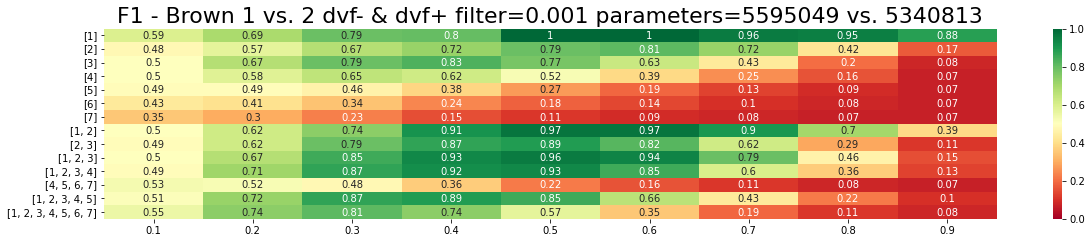

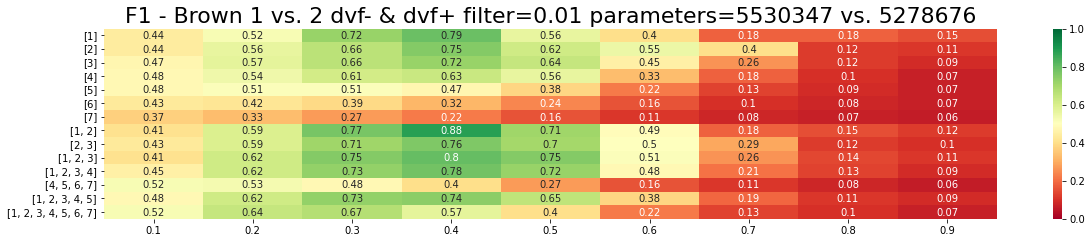

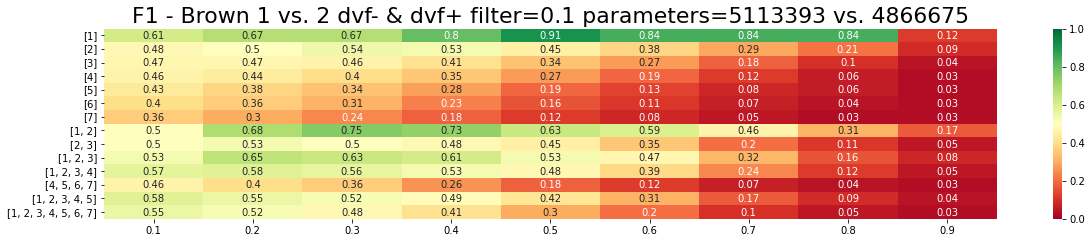

In [50]:
base1 = FreedomTokenizer(name='data/models/brown_chars_7_1',max_n=7,mode='chars',debug=False)
base2 = FreedomTokenizer(name='data/models/brown_chars_7_2',max_n=7,mode='chars',debug=False)
title = 'F1 - Brown 1 vs. 2 dvf- & dvf+'
cross_f_list = []
for model_threshold in model_thresholds:
    if model_threshold > 0:
        model_compress_with_loss(base1.model,model_threshold)
        model_compress_with_loss(base2.model,model_threshold)
    parameters1 = base1.count_params()
    parameters2 = base2.count_params()
    metrics = evaluate_freedom_tokenizer_options(test_texts,
        FreedomBasedTokenizer(base1,'dvf-','dvf+'),
        FreedomBasedTokenizer(base2,'dvf-','dvf+'),
        ngram_params,token_thresholds,title="{} filter={} parameters={} vs. {}".format(title,model_threshold,parameters1,parameters2))
    cross_f_list.extend([(model_threshold,m[0],m[1],m[2]) for m in metrics])
del base1
del base2


In [51]:
m_df = pd.DataFrame(ref_full_list,columns=['MT','NG','TT','F1'])
m_df1 = pd.DataFrame(ref_1_list,columns=['MT','NG','TT','F1'])
m_df2 = pd.DataFrame(ref_2_list,columns=['MT','NG','TT','F1'])
m_df12 = pd.DataFrame(cross_f_list,columns=['MT','NG','TT','F1'])
print('F1   X F1-1 ',m_df['F1'].corr(m_df1['F1']))
print('F1   X F1-2 ',m_df['F1'].corr(m_df2['F1']))
print('F1-1 X F1-2 ',m_df1['F1'].corr(m_df2['F1']))
print('F1   X F1-12',m_df['F1'].corr(m_df12['F1']))
print('F1-1 X F1-12',m_df1['F1'].corr(m_df12['F1']))
print('F1-2 X F1-12',m_df2['F1'].corr(m_df12['F1']))


F1   X F1-1  0.9872288393733827
F1   X F1-2  0.9793420065689269
F1-1 X F1-2  0.986359101574507
F1   X F1-12 0.947312128075061
F1-1 X F1-12 0.9479085857461799
F1-2 X F1-12 0.963212757882467


In [53]:
m_df12['F1-full'] = m_df['F1']
m_df12['F1-1'] = m_df1['F1']
m_df12['F1-2'] = m_df2['F1']
m_df12.sort_values(by='F1',ascending=False)[:10]

,MT,NG,TT,F1,F1-1,F1-2,F1-full
257,0.0010,[1],0.6,1.00,0.93,0.99,0.95
256,0.0010,[1],0.5,1.00,0.99,0.99,0.99
133,0.0001,[1],0.8,0.99,0.89,0.95,0.95
132,0.0001,[1],0.7,0.99,0.89,0.95,0.95
319,0.0010,"[1, 2]",0.5,0.97,0.98,0.96,0.98
320,0.0010,"[1, 2]",0.6,0.97,0.96,0.97,0.97
130,0.0001,[1],0.5,0.96,0.95,0.99,0.96
129,0.0001,[1],0.4,0.96,0.99,0.99,0.99
258,0.0010,[1],0.7,0.96,0.89,0.94,0.89
337,0.0010,"[1, 2, 3]",0.5,0.96,0.95,0.96,0.97


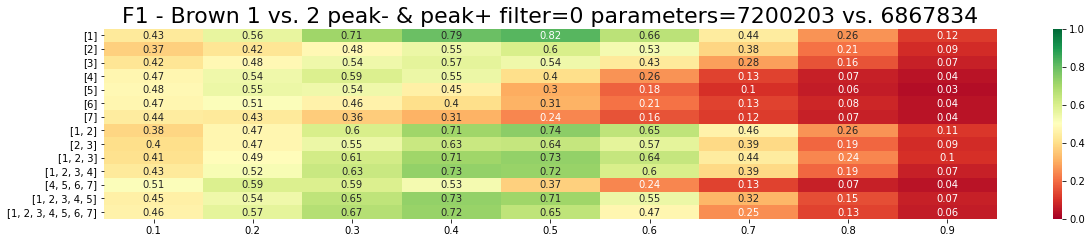

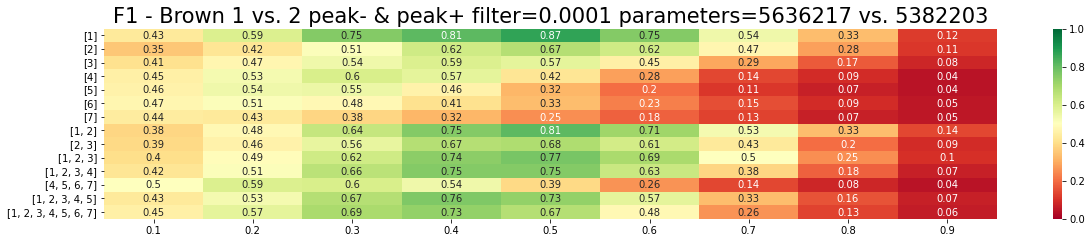

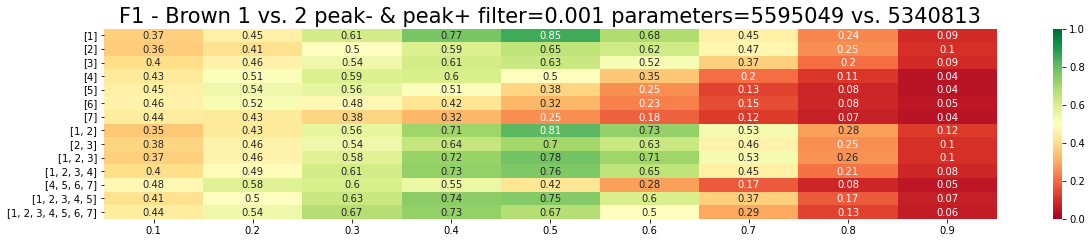

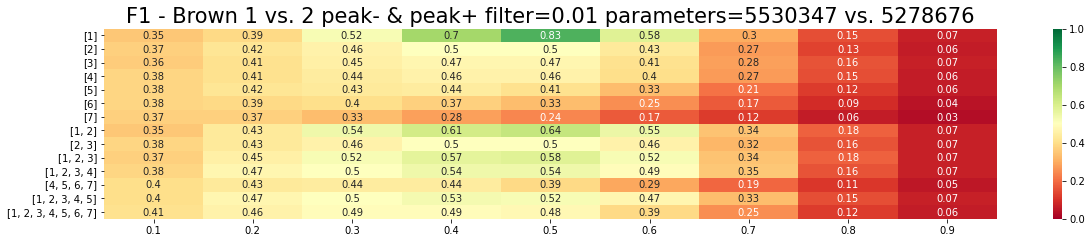

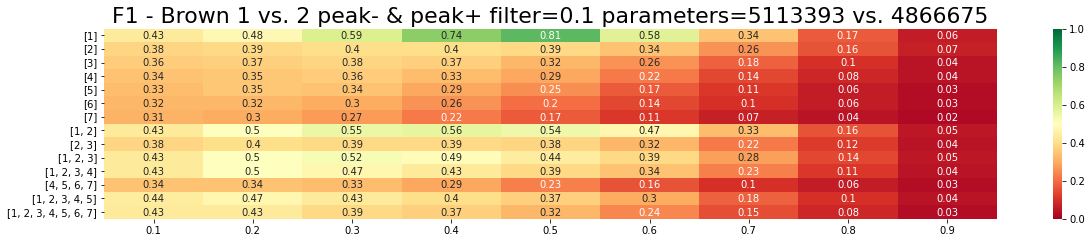

In [25]:
base1 = FreedomTokenizer(name='data/models/brown_chars_7_1',max_n=7,mode='chars',debug=False)
base2 = FreedomTokenizer(name='data/models/brown_chars_7_2',max_n=7,mode='chars',debug=False)
title = 'F1 - Brown 1 vs. 2 peak- & peak+'
for model_threshold in model_thresholds:
    if model_threshold > 0:
        model_compress_with_loss(base1.model,model_threshold)
        model_compress_with_loss(base2.model,model_threshold)
    parameters1 = base1.count_params()
    parameters2 = base2.count_params()
    evaluate_freedom_tokenizer_options(test_texts,
        FreedomBasedTokenizer(base1,'peak-','peak+'),
        FreedomBasedTokenizer(base2,'peak-','peak+'),
        ngram_params,token_thresholds,title="{} filter={} parameters={} vs. {}".format(title,model_threshold,parameters1,parameters2))
del base1
del base2

In [ ]:
#TODO documentation 
